In [5]:
import numpy as np
import seaborn as sn

import extract_data.runner as runner
import extract_data.fetch_data as fd

import mutual_information.cmi_computation as cmi

import grid2op
import os

import cluster.block_diag as bd

SEED = 29
np.random.seed(SEED)

In [2]:
path = 'C:\\Users\\david\\OneDrive\\Documenti\\GitHub\\thesis_AI4realnet_distributed-1\\data'

In [4]:
env = grid2op.make('l2rpn_case14_sandbox')
n = env.observation_space.n_line
m = env.observation_space.n_sub
connections = env.observation_space.sub_info

100%|██████████| 20/20 [00:01<00:00, 11.03it/s]


-----------------------------------------
Total time: 1.95 s


100%|██████████| 20/20 [00:01<00:00, 11.49it/s]


-----------------------------------------
Total time: 1.87 s


100%|██████████| 20/20 [00:01<00:00, 13.19it/s]


-----------------------------------------
Total time: 1.61 s


100%|██████████| 20/20 [00:01<00:00, 13.50it/s]


-----------------------------------------
Total time: 1.59 s


100%|██████████| 20/20 [00:01<00:00, 13.06it/s]


-----------------------------------------
Total time: 1.62 s


100%|██████████| 20/20 [00:01<00:00, 13.15it/s]


-----------------------------------------
Total time: 1.62 s


100%|██████████| 20/20 [00:01<00:00, 12.29it/s]


-----------------------------------------
Total time: 1.75 s


100%|██████████| 20/20 [00:01<00:00, 12.59it/s]


-----------------------------------------
Total time: 1.68 s


100%|██████████| 20/20 [00:01<00:00, 12.98it/s]


-----------------------------------------
Total time: 1.63 s


100%|██████████| 20/20 [00:01<00:00, 12.55it/s]


-----------------------------------------
Total time: 1.69 s


100%|██████████| 20/20 [00:01<00:00, 12.66it/s]


-----------------------------------------
Total time: 1.68 s


100%|██████████| 20/20 [00:01<00:00, 13.64it/s]


-----------------------------------------
Total time: 1.57 s


100%|██████████| 20/20 [00:01<00:00, 13.07it/s]


-----------------------------------------
Total time: 1.62 s


100%|██████████| 20/20 [00:01<00:00, 13.14it/s]


-----------------------------------------
Total time: 1.62 s


<Axes: >

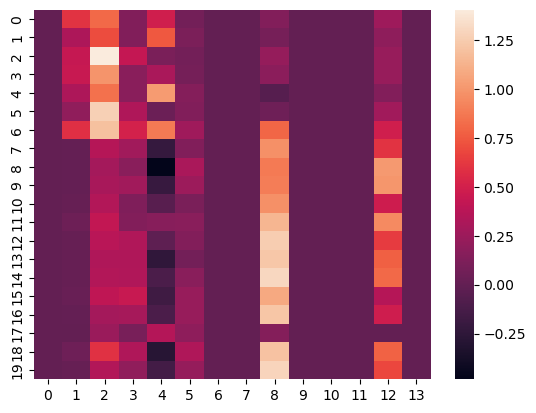

In [8]:
mi = np.zeros((n,m))
smi = np.zeros((n,m))

for i in range(m):
    if connections[i] > 3:
        sub_path = os.path.join(path, f'cas14_data/case14_sub{i}/case14_sub{i}_hist.npz')

        hist = np.load(sub_path)['data'][:1000]
        shist = hist.copy()
        np.random.shuffle(shist[:,:n])

        mi_vector, eta = cmi.compute_mi_matrix_parallel(n, m, i, hist)
        mi[:,i] = mi_vector[:,n+i]
        
        shuffled_vector, seta = cmi.compute_mi_matrix_parallel(n, m, i, shist)
        smi[:,i] = shuffled_vector[:, n+1]

umi = mi - smi
sn.heatmap(umi)

In [10]:
bd.diagonalize(umi, os.path.join(path, 'diagonalizations_'), [0.7], 'l2rpn_case14_sandbox')


Threshold quantile: 0.7

